In [1]:
from google.colab import files
uploaded = files.upload()

Saving voice (2).csv to voice (2).csv


In [2]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
df = pd.read_csv('voice (2).csv', encoding='latin-1')

Shape dataset: (3168, 21)
Label unik: ['male' 'female']

Distribusi label (0=female, 1=male):
 male      1584
female    1584
Name: count, dtype: int64


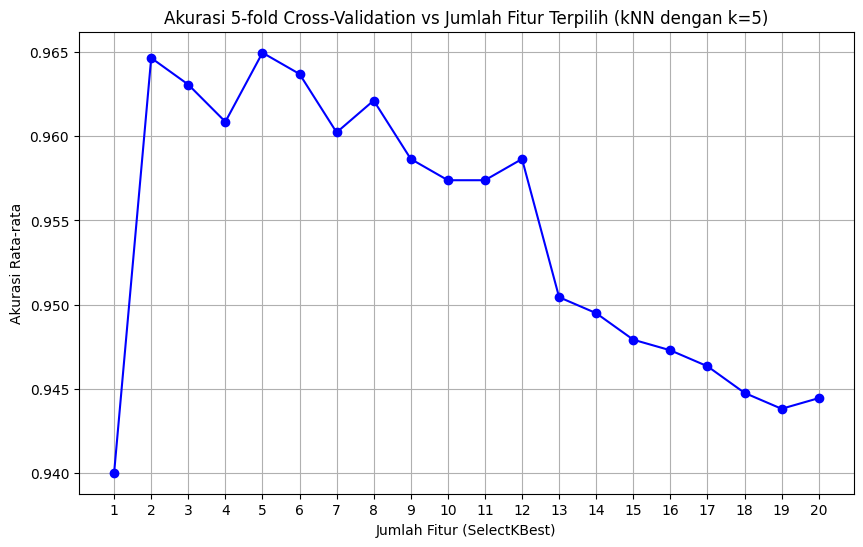


Jumlah fitur optimal: 5
Akurasi CV terbaik (dengan 5 fitur): 0.9650
Fitur terpilih yang paling optimal: ['sd', 'Q25', 'IQR', 'sp.ent', 'meanfun']

Hyperparameter kNN terbaik: {'knn__metric': 'manhattan', 'knn__n_neighbors': 6, 'knn__weights': 'uniform'}
Akurasi CV terbaik setelah tuning: 0.9675

Akurasi terbaik pada data test: 0.9826

Classification Report:
               precision    recall  f1-score   support

      female       0.98      0.98      0.98       317
        male       0.98      0.98      0.98       317

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



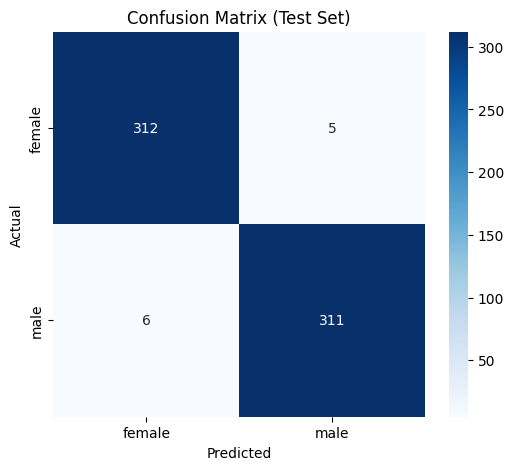

In [9]:
# Import semua library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Load dataset
df = pd.read_csv('voice (2).csv')

# Preprocessing
print("Shape dataset:", df.shape)
print("Label unik:", df['label'].unique())

le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])  # female=0, male=1 (berdasarkan urutan alfabet)

X = df.drop('label', axis=1)
y = df['label']

print("\nDistribusi label (0=female, 1=male):\n", pd.Series(le.inverse_transform(y)).value_counts())

# 2. Percobaan pemilihan fitur optimal dengan SelectKBest (ANOVA F-value)
k_range = range(1, 21)
cv_scores = []

for k in k_range:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('selector', SelectKBest(f_classif, k=k)),
        ('knn', KNeighborsClassifier(n_neighbors=5))
    ])
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plot grafik analisis jumlah fitur vs akurasi
plt.figure(figsize=(10, 6))
plt.plot(k_range, cv_scores, marker='o', linestyle='-', color='b')
plt.title('Akurasi 5-fold Cross-Validation vs Jumlah Fitur Terpilih (kNN dengan k=5)')
plt.xlabel('Jumlah Fitur (SelectKBest)')
plt.ylabel('Akurasi Rata-rata')
plt.grid(True)
plt.xticks(k_range)
plt.show()

# Temukan jumlah fitur terbaik
best_k = np.argmax(cv_scores) + 1
best_cv_score = max(cv_scores)
print(f"\nJumlah fitur optimal: {best_k}")
print(f"Akurasi CV terbaik (dengan {best_k} fitur): {best_cv_score:.4f}")

# Dapatkan nama fitur terbaik
selector = SelectKBest(f_classif, k=best_k)
selector.fit(StandardScaler().fit_transform(X), y)
selected_features = X.columns[selector.get_support()].tolist()
print("Fitur terpilih yang paling optimal:", selected_features)

# 3. Fine-tuning kNN dengan fitur terbaik + evaluasi final
X_selected = X[selected_features]

# Tuning hyperparameter kNN
pipeline_tuned = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

param_grid = {
    'knn__n_neighbors': range(1, 30),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(pipeline_tuned, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_selected, y)

print("\nHyperparameter kNN terbaik:", grid.best_params_)
print(f"Akurasi CV terbaik setelah tuning: {grid.best_score_:.4f}")

# Evaluasi final pada split test
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

final_accuracy = accuracy_score(y_test, y_pred)
print(f"\nAkurasi terbaik pada data test: {final_accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix - PERBAIKAN
cm = confusion_matrix(y_test, y_pred)  # Gunakan y_test dan y_pred yang masih numerik

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['female', 'male'], yticklabels=['female', 'male'])
plt.title('Confusion Matrix (Test Set)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Berdasarkan fitur yang telah Anda pilih pada soal nomor 2, berapa nilai  yang terbaik? Lampirkan grafika analisis dan alasan Anda.

**Nilai Terbaik:**

Setelah melakukan percobaaan dengan 5 fitur yang optimal menghasilkan nilai performa tertinggi dengan akurasi cross validation sebesar 96,75%, akurasi pada dataset sebesar 98,26%, dan F1-Score sebesar 0,98 yang berarti mendekati angka 1 dimana hasil dinyatakan optimal.

**Analisa Grafik:**

Grafik analisa akurasivs jumlah fitur menunjukkan akurasi meningkat tajam hingga 5 fitur dimana sampai 96,50%.